# News Categorizer

Predicts news a

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import unicodedata
import string
import os
import csv
import re

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

import sklearn.metrics as skm

In [204]:
news_df = pd.read_csv(os.path.join('news-data', 'uci-news-aggregator.csv'), header=0, index_col=0, dtype=str)
print('Read .csv file from local copy of dataset.')

Read .csv file from local copy of dataset.


In [205]:
news_df.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
ID,,,,,,,
1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [206]:
news_df.isnull().sum()

TITLE        0
URL          0
PUBLISHER    2
CATEGORY     0
STORY        0
HOSTNAME     0
TIMESTAMP    0
dtype: int64

In [207]:
category_dict = {
    'b':'business',
    'e':'entertainment',
    'm':'health',
    't':'science/technology'
}

news_df['CATEGORY'] = news_df['CATEGORY'].map(category_dict)

In [208]:
news_df.head()

,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
ID,,,,,,,
1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,business,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [213]:
stopwords =  nltk.corpus.stopwords.words('english')

In [214]:
def remove_stopwords(s1):
    s1 = ' '.join([word
                   for word in s1.split()
                   if word not in stopwords])
    return s1

In [217]:
def remove_punctuation(s1):
    """
    Returns s1 unicode-normalised without punctuation that is not
    word-internal (e.g., hyphens, apostrophes) removed.
    """
    # TODO: optimise with pandas' str replace
    
    # remove punctuation that is not word-internal (e.g., hyphens, apostrophes)
    s1 = re.sub('\b\W+',' ',s1)
    s1 = re.sub('\W+\b',' ',s1)
    #s1 = re.sub('(\b\W+)|(\W+\b)',' ',s1)
    return unicodedata.normalize("NFKD", s1)

In [218]:
news_df['TITLE'] = news_df['TITLE'].str.lower()
news_df['TITLE'] = news_df['TITLE'].apply(remove_punctuation)

In [185]:
vectorizer = CountVectorizer()
vectorizer.fit(news_df['TITLE'])
features = vectorizer.transform(news_df['TITLE'])

encoder = LabelEncoder()
encoder.fit(news_df['CATEGORY'])
labels = encoder.transform(news_df['CATEGORY'])

In [186]:
# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((337935, 54598), (84484, 54598), (337935,), (84484,))

In [187]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

nb.score(x_test, y_test)
#0.9269684200558685

0.9264831210643435

In [190]:
sgd = SGDClassifier(early_stopping=True)
sgd.fit(x_train, y_train)

#pred=SGD.predict(x_test)
sgd.score(x_test, y_test)

0.9391245679655319

In [111]:
# from sklearn.svm import LinearSVC

# svc = LinearSVC()
# svc.fit(x_train, y_train)
# svc.score(x_test, y_test)

0.9471497561668482

In [116]:
# from sklearn.ensemble import RandomForestClassifier

# forest = RandomForestClassifier()
# forest = forest.fit(x_train, y_train)
# forest.score(x_test, y_test)

0.36653094076984993

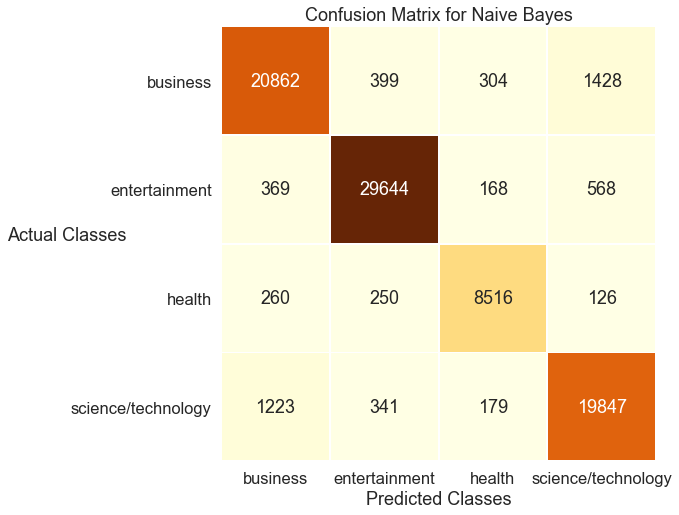

In [174]:
def confusion_mat(model_name, confusion_matrix, cmap='YlOrBr'):
    #hardcoded index and columns
    cof=pd.DataFrame(confusion_matrix)
    sns.set(font_scale=1.5)
    plt.figure(figsize=(8,8))

    sns.heatmap(cof, cmap=cmap,linewidths=1, annot=True,square=True, fmt='d', cbar=False,
                xticklabels=category_dict.values(),
                yticklabels=category_dict.values())
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Classes', rotation=0)
    plt.ylabel('Actual Classes', rotation=0)

y_pred = nb.predict(x_test)
matrix = skm.confusion_matrix(y_test, y_pred)
confusion_mat('Naive Bayes', matrix)

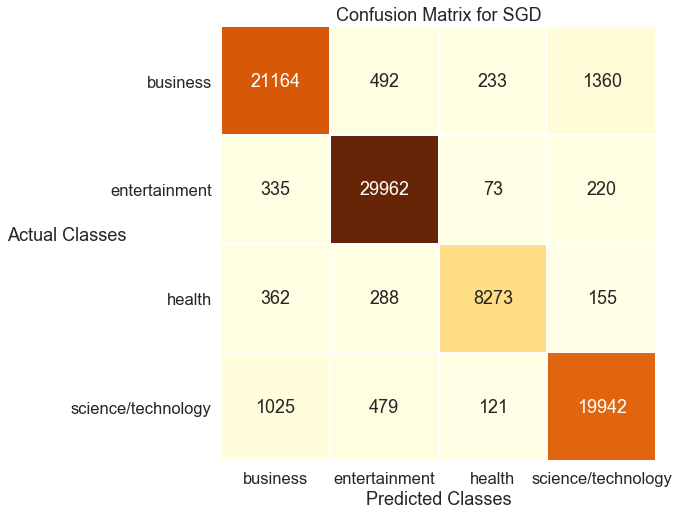

In [191]:
y_pred = sgd.predict(x_test)
matrix = skm.confusion_matrix(y_test, y_pred)
confusion_mat('SGD', matrix)

In [165]:
def predict_categories(model, titles):
    titles_s = pd.Series(titles)
    titles_s = titles_s.str.lower()
    titles_s = titles_s.apply(remove_punctuation)
    
    text = vectorizer.transform(titles)

    category = model.predict(text)
    
    return encoder.inverse_transform(category)

In [175]:
titles = [
    'The Sea’s Weirdest Creatures, Now in ‘Staggering’ Detail',
    'Watch This Black Hole Blow Bubbles',
    'Falling Jobless Rate Could Imperil Aid Underpinning the Recovery',
    'OPEC and Russia Are Likely to Extend Oil Production Cuts',
    'Doctors Heavily Overprescribed Antibiotics Early in the Pandemic',
    '15 Years Since Tom Cruise Infamously Jumped on Oprah\'s Couch',
    'YouTube is hosting a star-studded tribute to the class of 2020 this weekend',
]

test_df = pd.DataFrame(titles, columns=['title'])

test_df['predicted_category'] = predict_categories(nb, titles)
test_df.sort_values(by='predicted_category')

,title,predicted_category
2,Falling Jobless Rate Could Imperil Aid Underpi...,business
3,OPEC and Russia Are Likely to Extend Oil Produ...,business
1,Watch This Black Hole Blow Bubbles,entertainment
5,15 Years Since Tom Cruise Infamously Jumped on...,entertainment
6,YouTube is hosting a star-studded tribute to t...,entertainment
4,Doctors Heavily Overprescribed Antibiotics Ear...,health
0,"The Sea’s Weirdest Creatures, Now in ‘Staggeri...",science/technology


In [202]:
test_df['predicted_category'] = predict_categories(sgd, titles)
test_df.sort_values(by='predicted_category')

,title,predicted_category
2,Falling Jobless Rate Could Imperil Aid Underpi...,business
3,OPEC and Russia Are Likely to Extend Oil Produ...,business
1,Watch This Black Hole Blow Bubbles,entertainment
5,15 Years Since Tom Cruise Infamously Jumped on...,entertainment
6,YouTube is hosting a star-studded tribute to t...,entertainment
4,Doctors Heavily Overprescribed Antibiotics Ear...,health
0,"The Sea’s Weirdest Creatures, Now in ‘Staggeri...",science/technology
